In [3]:
"""
Recommender System
추천 시스템이란?
컨텐츠 기반 필터링
협력 필터링{기억 기반:최근접 기억기반(사용자 기반, 아이템 기반), 모델 기반}
하이브리드

2000년도 초반에는 콘텐츠 기반 필터링이 많이 사용, 그 후 협력 필터링 많이 사용
모델기반: 행렬 분해를 통해서 잠재적인 요인 추출

콘텐츠 기반 필터링: 콘텐츠 기반으로 분석하여 추천해주는 방식,
- 사용자가 관심분야에 대해서 직접 입력한 정보나, 구매 내역, 평점 등을 기반으로 선호 아이템 파악
- 선호하는 아이템과 가장 유사한 아이템 추천
- 장점: 아이템 속성(콘텐츠)을 기반으로 추천, 이전에 선택 이력이 없는 새로운 아이템도 추천 가능
- 단점: 해당 고객에 대한 데이터가 부족한 경우 추천 성능 보정이 어렵다

협력 필터링(기억기반)
- '특정 아이템에 대하여 선호도가 유사한 고객들은 다른 아이템에 대해서도 비슷하 선호도를 보일 것이다'
- 사용자 기반 협력 필터링: 사용자 간의 유사도를 측정하여 유사도 높은 이웃이 선택한 아이템 중에서 추천
- 아이템 기반 협력 필터링: 아이템 간 유사도를 측정하여 유사도 높은 아이템을 추천

협력 필터링(모델 기반)
- 데이터에 내제 되어있는 복잡한 패턴을 발견하도록 다양한 모델을 활용한 기법
- 실제 데이터에 적용했을 때 성능이 우수함
- Matrix Factorization(행렬 인수분해)
- '사용자와 아이템 사이에는 사용자의 행동과 평점에 영향을 끼치는 잠재되 특성이 있을 것이다'
- 크기가 크며 복잡한 데이터로도 쉽고 빠르게 분석 진행이 가능
- 모델 기반의 성능은 잠재요인의 수에 따라서 성능이 달라진다.
- 특정 사용자의 특정 아이템에 대한 평점을 알고 싶을 때 활용


"""

"\nRecommender System\n추천 시스템이란?\n컨텐츠 기반 필터링\n협력 필터링{기억 기반:최근접 기억기반(사용자 기반, 아이템 기반), 모델 기반}\n하이브리드\n\n2000년도 초반에는 콘텐츠 기반 필터링이 많이 사용, 그 후 협력 필터링 많이 사용\n모델기반: 행렬 분해를 통해서 잠재적인 요인 추출\n\n콘텐츠 기반 필터링: 콘텐츠 기반으로 분석하여 추천해주는 방식,\n- 사용자가 관심분야에 대해서 직접 입력한 정보나, 구매 내역, 평점 등을 기반으로 선호 아이템 파악\n- 선호하는 아이템과 가장 유사한 아이템 추천\n- 장점: 아이템 속성(콘텐츠)을 기반으로 추천, 이전에 선택 이력이 없는 새로운 아이템도 추천 가능\n- 단점: 해당 고객에 대한 데이터가 부족한 경우 추천 성능 보정이 어렵다\n\n협력 필터링(기억기반)\n- '특정 아이템에 대하여 선호도가 유사한 고객들은 다른 아이템에 대해서도 비슷하 선호도를 보일 것이다'\n- 사용자 기반 협력 필터링: 사용자 간의 유사도를 측정하여 유사도 높은 이웃이 선택한 아이템 중에서 추천\n- 아이템 기반 협력 필터링: 아이템 간 유사도를 측정하여 유사도 높은 아이템을 추천\n\n협력 필터링(모델 기반)\n- 데이터에 내제 되어있는 복잡한 패턴을 발견하도록 다양한 모델을 활용한 기법\n- 실제 데이터에 적용했을 때 성능이 우수함\n- Matrix Factorization(행렬 인수분해)\n- '사용자와 아이템 사이에는 사용자의 행동과 평점에 영향을 끼치는 잠재되 특성이 있을 것이다'\n- 크기가 크며 복잡한 데이터로도 쉽고 빠르게 분석 진행이 가능\n- 모델 기반의 성능은 잠재요인의 수에 따라서 성능이 달라진다.\n- 특정 사용자의 특정 아이템에 대한 평점을 알고 싶을 때 활용\n\n\n"

In [4]:
# 연관분석 기반의 추천 시스템

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
chipo = pd.read_csv('chipotle.csv') 
#데이터가 컴마로 분류되어있으면 csv로 부르면된다, 확장자가 꼭csv일 필요없다
chipo
#tsv파일은 공백으로 분류되어있다.
#tsv파일은 따로 부르는 법이없어서 ("파일명.csv", sep="\t")
chipo.info()
chipo.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [14]:
chipo.describe()
chipo['quantity'].describe() #특정열에 대한 기술통계

count    4622.000000
mean        1.075725
std         0.410186
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        15.000000
Name: quantity, dtype: float64

In [ ]:
chipo에 item_price_float 열 추가($기호 제외, float으로 변환하여 저장)

In [16]:
chipo['item_price_float'] = chipo['item_price'].str.replace('$','').astype('float')
#chipo['item_price'].map(lambda x:x[1:]).astype(float)
#chipo['item_price'].apply(lambda x: x[1:]).astype('float')
#chipo['item_price'].str.lstrip('$') 
#괄호아에 아무것도안쓰면 외쪽 공백이제거 기제하면 외쪽의 기제한문자가 제거

C:\Users\user\AppData\Local\Temp\ipykernel_8928\449045423.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  chipo['item_price_float'] = chipo['item_price'].str.replace('$','').astype('float')


In [19]:
chipo.head()
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   object 
 5   item_price_float    4622 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 216.8+ KB


In [20]:
chipo.describe()

,order_id,quantity,item_price_float
count,4622.000000,4622.000000,4622.000000
mean,927.254868,1.075725,7.464336
std,528.890796,0.410186,4.245557
min,1.000000,1.000000,1.090000
25%,477.250000,1.000000,3.390000
50%,926.000000,1.000000,8.750000
75%,1393.000000,1.000000,9.250000
max,1834.000000,15.000000,44.250000


In [24]:
chipo['item_name'].unique()
len(chipo['item_name'].unique()) # 50가지
chipo['item_name'].value_counts() # 각 메뉴의 주문수

Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Steak Bowl                               211
Chips                                    211
Bottled Water                            162
Chicken Soft Tacos                       115
Chips and Fresh Tomato Salsa             110
Chicken Salad Bowl                       110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48
Chicken Cr

In [ ]:
#chipo['item_name'] 열 기준으로 item_price_float 평균

In [32]:
chipo_cost=chipo.groupby(['item_name'])['item_price_float'].mean()
chipo_cost.sort_values(ascending=False)

item_name
Bowl                                     14.800000
Steak Salad Bowl                         11.847931
Chicken Salad Bowl                       11.170455
Carnitas Crispy Tacos                    11.137143
Carnitas Salad Bowl                      11.056667
Barbacoa Crispy Tacos                    10.928182
Carnitas Bowl                            10.833971
Steak Bowl                               10.711801
Barbacoa Salad Bowl                      10.640000
Veggie Soft Tacos                        10.565714
Steak Burrito                            10.465842
Veggie Bowl                              10.211647
Steak Crispy Tacos                       10.209714
Barbacoa Bowl                            10.187273
Veggie Salad Bowl                        10.138889
Carnitas Burrito                         10.132712
Chicken Bowl                             10.113953
Chicken Burrito                          10.082857
Chicken Crispy Tacos                     10.045319
Barbacoa Soft Tacos  

In [35]:
chipo.head()
chipo.drop(['order_id'], axis='columns', inplace=True)

In [38]:
chipo['choice_description']

0                                                     NaN
1                                            [Clementine]
2                                                 [Apple]
3                                                     NaN
4       [Tomatillo-Red Chili Salsa (Hot), [Black Beans...
                              ...                        
4617    [Fresh Tomato Salsa, [Rice, Black Beans, Sour ...
4618    [Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...
4619    [Fresh Tomato Salsa, [Fajita Vegetables, Pinto...
4620    [Fresh Tomato Salsa, [Fajita Vegetables, Lettu...
4621    [Fresh Tomato Salsa, [Fajita Vegetables, Pinto...
Name: choice_description, Length: 4622, dtype: object

In [39]:
chipo
chipo['choice_description'].value_counts()
chipo['choice_description'].fillna('Origin', inplace=True)

In [42]:
chipo.info()
chipo.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   quantity            4622 non-null   int64  
 1   item_name           4622 non-null   object 
 2   choice_description  4622 non-null   object 
 3   item_price          4622 non-null   object 
 4   item_price_float    4622 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 180.7+ KB


,quantity,item_name,choice_description,item_price,item_price_float
0,1,Chips and Fresh Tomato Salsa,Origin,$2.39,2.39
1,1,Izze,[Clementine],$3.39,3.39
2,1,Nantucket Nectar,[Apple],$3.39,3.39
3,1,Chips and Tomatillo-Green Chili Salsa,Origin,$2.39,2.39
4,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,16.98


In [44]:
chipo['choice_description'].loc[4] 
#리스트구조가아니라 문자열구조로 되어있는 리스트다

'[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]'

In [45]:
chipo=pd.read_csv("chipotle.csv") #tsv
chipo
#chipo에서 order_id가 같은 데이터끼리 묶어서 트랜잭션으로 구성

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [48]:
df = chipo[['order_id', 'item_name']]

In [55]:
df['order_id'].max()
df_arr=[[] for i in range(1, df['order_id'].max()+1)] # 1~1834+1

In [56]:
np.shape(df_arr) # [[  ], [  ], ..., [  ]] => TransactionEncoder

(1834, 0)

In [58]:
n=0
for i in df['item_name']:
    df_arr[df['order_id'][n]-1].append(i)
    n+=1
    #df_arr 에 i가 append되어야 함

In [59]:
df_arr

[['Chips and Fresh Tomato Salsa',
  'Izze',
  'Nantucket Nectar',
  'Chips and Tomatillo-Green Chili Salsa'],
 ['Chicken Bowl'],
 ['Chicken Bowl', 'Side of Chips'],
 ['Steak Burrito', 'Steak Soft Tacos'],
 ['Steak Burrito', 'Chips and Guacamole'],
 ['Chicken Crispy Tacos', 'Chicken Soft Tacos'],
 ['Chicken Bowl', 'Chips and Guacamole'],
 ['Chips and Tomatillo-Green Chili Salsa', 'Chicken Burrito'],
 ['Chicken Burrito', 'Canned Soda'],
 ['Chicken Bowl', 'Chips and Guacamole'],
 ['Barbacoa Burrito', 'Nantucket Nectar'],
 ['Chicken Burrito', 'Izze'],
 ['Chips and Fresh Tomato Salsa', 'Chicken Bowl'],
 ['Carnitas Burrito', 'Canned Soda'],
 ['Chicken Burrito', 'Chips and Tomatillo-Green Chili Salsa'],
 ['Steak Burrito', 'Side of Chips'],
 ['Carnitas Bowl', 'Bottled Water'],
 ['Chicken Soft Tacos',
  'Chicken Soft Tacos',
  'Chips and Guacamole',
  'Chips and Tomatillo Green Chili Salsa'],
 ['Barbacoa Bowl', 'Chips'],
 ['Chips and Guacamole',
  'Chicken Bowl',
  'Steak Burrito',
  'Chicken S

In [77]:
#전체 주문에서 한번의 주문에 가장 많은 메뉴 개수는?
max(len(lst) for lst in df_arr)

23

In [79]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [82]:
te=TransactionEncoder()
te_arr=te.fit(df_arr).transform(df_arr)

In [86]:
te_arr
te_df=pd.DataFrame(te_arr, columns=te.columns_) #te.columns_컬럼명도 같이 준다

In [87]:
te_df

,6 Pack Soft Drink,Barbacoa Bowl,Barbacoa Burrito,Barbacoa Crispy Tacos,Barbacoa Salad Bowl,Barbacoa Soft Tacos,Bottled Water,Bowl,Burrito,Canned Soda,...,Steak Crispy Tacos,Steak Salad,Steak Salad Bowl,Steak Soft Tacos,Veggie Bowl,Veggie Burrito,Veggie Crispy Tacos,Veggie Salad,Veggie Salad Bowl,Veggie Soft Tacos
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1830,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [92]:
freq_items=apriori(te_df, min_support=0.02, use_colnames=True) #use_colnames=True 이름나오게
freq_items

,support,itemsets
0,0.029444,(6 Pack Soft Drink)
1,0.033261,(Barbacoa Bowl)
2,0.047983,(Barbacoa Burrito)
3,0.083969,(Bottled Water)
4,0.051254,(Canned Soda)
5,0.150491,(Canned Soft Drink)
6,0.036532,(Carnitas Bowl)
7,0.031625,(Carnitas Burrito)
8,0.020720,(Carnitas Soft Tacos)
9,0.335333,(Chicken Bowl)


In [94]:
ar_df = association_rules(freq_items, metric='lift', min_threshold=1)
ar_df
#min_threshold=1은 lift가 1이상인것만 나온다

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Chicken Bowl),(Bottled Water),0.335333,0.083969,0.037623,0.112195,1.336142,0.009465,1.031793,0.378500
1,(Bottled Water),(Chicken Bowl),0.083969,0.335333,0.037623,0.448052,1.336142,0.009465,1.204221,0.274638
2,(Chicken Bowl),(Canned Soft Drink),0.335333,0.150491,0.060523,0.180488,1.199328,0.010059,1.036604,0.250050
3,(Canned Soft Drink),(Chicken Bowl),0.150491,0.335333,0.060523,0.402174,1.199328,0.010059,1.111807,0.195642
4,(Canned Soft Drink),(Chips),0.150491,0.113413,0.031625,0.210145,1.852912,0.014557,1.122468,0.541853
5,(Chips),(Canned Soft Drink),0.113413,0.150491,0.031625,0.278846,1.852912,0.014557,1.177986,0.519192
6,(Chicken Bowl),(Chips),0.335333,0.113413,0.066521,0.198374,1.749124,0.028490,1.105985,0.644360
7,(Chips),(Chicken Bowl),0.113413,0.335333,0.066521,0.586538,1.749124,0.028490,1.607568,0.483072
8,(Steak Bowl),(Chips and Guacamole),0.102508,0.258451,0.028899,0.281915,1.090785,0.002405,1.032675,0.092735
9,(Chips and Guacamole),(Steak Bowl),0.258451,0.102508,0.028899,0.111814,1.090785,0.002405,1.010478,0.112236


In [95]:
#chips가 판매가 중단 -> 어떤상품이 영향받을까?
ar_df[ar_df['antecedents'] == frozenset({'Chips'})]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
5,(Chips),(Canned Soft Drink),0.113413,0.150491,0.031625,0.278846,1.852912,0.014557,1.177986,0.519192
7,(Chips),(Chicken Bowl),0.113413,0.335333,0.066521,0.586538,1.749124,0.028490,1.607568,0.483072


In [ ]:
#apriori 사용법

In [198]:
df=pd.read_csv("ex_data.csv", parse_dates=['Date']) 
#parse_dates데이터 읽어올때 날짜/시간 데이터 파싱
df

C:\Users\user\AppData\Local\Temp\ipykernel_8928\588676557.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df=pd.read_csv("ex_data.csv", parse_dates=['Date'])


,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-05-01,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-01-02,whole milk
...,...,...,...
38760,4471,2014-08-10,sliced cheese
38761,2022,2014-02-23,candy
38762,1097,2014-04-16,cake bar
38763,1510,2014-03-12,fruit/vegetable juice


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


In [200]:
df.Date.max()

Timestamp('2015-12-30 00:00:00')

In [201]:
df['year']=df.Date.dt.year
df['month']=df.Date.dt.month
df['day']=df.Date.dt.day
df['day_of_week']=df.Date.dt.day_name()

In [202]:
df

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,Tuesday
1,2552,2015-05-01,whole milk,2015,5,1,Friday
2,2300,2015-09-19,pip fruit,2015,9,19,Saturday
3,1187,2015-12-12,other vegetables,2015,12,12,Saturday
4,3037,2015-01-02,whole milk,2015,1,2,Friday
...,...,...,...,...,...,...,...
38760,4471,2014-08-10,sliced cheese,2014,8,10,Sunday
38761,2022,2014-02-23,candy,2014,2,23,Sunday
38762,1097,2014-04-16,cake bar,2014,4,16,Wednesday
38763,1510,2014-03-12,fruit/vegetable juice,2014,3,12,Wednesday


Text(0, 0.5, 'cnt')

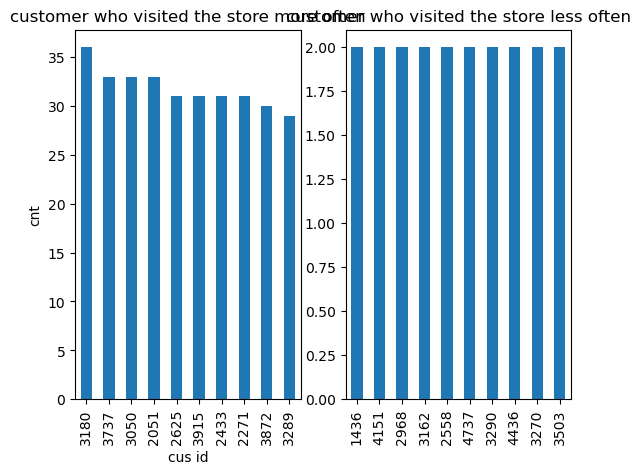

In [203]:
fig, (ax, ax2)=plt.subplots(ncols=2)
df['Member_number'].value_counts().head(10).plot(ax=ax, kind='bar',
                                                 title='customer who visited the store more often')
ax.set_xlabel('cus id')
ax.set_ylabel('cnt')
df['Member_number'].value_counts(ascending=True).head(10).plot(ax=ax2, kind='bar',
                                                 title='customer who visited the store less often')
ax.set_xlabel('cus id')
ax.set_ylabel('cnt')

In [205]:
pip install apyori

Note: you may need to restart the kernel to use updated packages.


In [206]:
import apyori

In [207]:
df

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,Tuesday
1,2552,2015-05-01,whole milk,2015,5,1,Friday
2,2300,2015-09-19,pip fruit,2015,9,19,Saturday
3,1187,2015-12-12,other vegetables,2015,12,12,Saturday
4,3037,2015-01-02,whole milk,2015,1,2,Friday
...,...,...,...,...,...,...,...
38760,4471,2014-08-10,sliced cheese,2014,8,10,Sunday
38761,2022,2014-02-23,candy,2014,2,23,Sunday
38762,1097,2014-04-16,cake bar,2014,4,16,Wednesday
38763,1510,2014-03-12,fruit/vegetable juice,2014,3,12,Wednesday


In [208]:
df.groupby('Date')['itemDescription'].unique()

Date
2014-01-01    [cleaner, sausage, tropical fruit, whole milk,...
2014-01-02    [other vegetables, pip fruit, frankfurter, sug...
2014-01-03    [sausage, meat, sugar, bottled beer, whole mil...
2014-01-04    [frankfurter, pastry, salty snack, bottled bee...
2014-01-05    [sausage, root vegetables, whipped/sour cream,...
                                    ...                        
2015-12-26    [bottled water, herbs, sausage, pip fruit, chi...
2015-12-27    [chicken, frankfurter, other vegetables, tropi...
2015-12-28    [onions, root vegetables, citrus fruit, rolls/...
2015-12-29    [pork, UHT-milk, whole milk, sausage, specialt...
2015-12-30    [frankfurter, turkey, canned beer, other veget...
Name: itemDescription, Length: 728, dtype: object

In [209]:
df_time=pd.DataFrame(df.groupby('Date')['itemDescription'].nunique().index)
df_time

,Date
0,2014-01-01
1,2014-01-02
2,2014-01-03
3,2014-01-04
4,2014-01-05
...,...
723,2015-12-26
724,2015-12-27
725,2015-12-28
726,2015-12-29


In [210]:
#일 별 판매된 상품 종류 개수
df_time['prd_num']=df.groupby('Date')['itemDescription'].nunique().values
df_time['mem_cnt']=df.groupby('Date')['Member_number'].nunique().values

In [211]:
df_time.set_index('Date', inplace=True)
df_time

,prd_num,mem_cnt
Date,,
2014-01-01,30,21
2014-01-02,45,29
2014-01-03,36,24
2014-01-04,33,28
2014-01-05,31,20
...,...,...
2015-12-26,26,15
2015-12-27,43,21
2015-12-28,37,19


In [212]:
df_time['items']=df.groupby('Date')['itemDescription'].unique().values

In [213]:
df_time

,prd_num,mem_cnt,items
Date,,,
2014-01-01,30,21,"[cleaner, sausage, tropical fruit, whole milk,..."
2014-01-02,45,29,"[other vegetables, pip fruit, frankfurter, sug..."
2014-01-03,36,24,"[sausage, meat, sugar, bottled beer, whole mil..."
2014-01-04,33,28,"[frankfurter, pastry, salty snack, bottled bee..."
2014-01-05,31,20,"[sausage, root vegetables, whipped/sour cream,..."
...,...,...,...
2015-12-26,26,15,"[bottled water, herbs, sausage, pip fruit, chi..."
2015-12-27,43,21,"[chicken, frankfurter, other vegetables, tropi..."
2015-12-28,37,19,"[onions, root vegetables, citrus fruit, rolls/..."


C:\Users\user\AppData\Local\Temp\ipykernel_8928\2942333250.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_time['mem_cnt'], shade=True)


<Axes: xlabel='mem_cnt', ylabel='Density'>

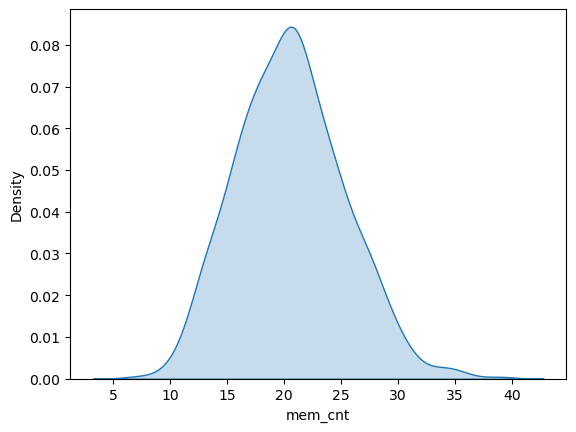

In [214]:
sns.kdeplot(df_time['mem_cnt'], shade=True)

In [215]:
df_time['items'].tolist() #tolist하면 리스트로 바뀜

[array(['cleaner', 'sausage', 'tropical fruit', 'whole milk',
        'citrus fruit', 'onions', 'other vegetables', 'berries',
        'hamburger meat', 'bottled water', 'butter', 'yogurt', 'waffles',
        'soda', 'sliced cheese', 'curd', 'specialty chocolate',
        'shopping bags', 'flower (seeds)', 'coffee', 'whipped/sour cream',
        'frozen potato products', 'candles', 'bottled beer',
        'Instant food products', 'frozen vegetables', 'brown bread',
        'domestic eggs', 'dishes', 'chocolate'], dtype=object),
 array(['other vegetables', 'pip fruit', 'frankfurter', 'sugar',
        'frozen vegetables', 'beef', 'waffles', 'meat', 'root vegetables',
        'pastry', 'butter', 'brown bread', 'ice cream', 'soda',
        'rolls/buns', 'chicken', 'citrus fruit', 'white bread',
        'frozen fish', 'sparkling wine', 'cream cheese ', 'whole milk',
        'tropical fruit', 'fruit/vegetable juice', 'yogurt',
        'condensed milk', 'curd', 'soft cheese', 'canned beer', '

In [216]:
from apyori import apriori

In [255]:
#rules=apriori(transactions=df_time['items'].tolist(), min_support=0.0003, min_confidence=0.01)
rules=apriori(transactions=df_time['items'].tolist(), 
              min_support=0.002, min_confidence=0.02, min_lift=5, min_length=2, max_length=2)

In [256]:
res=list(rules)

In [257]:
pd.DataFrame(res)

,items,support,ordered_statistics
0,"(Instant food products, baby cosmetics)",0.002747,"[((Instant food products), (baby cosmetics), 0..."
1,"(baby cosmetics, salt)",0.002747,"[((baby cosmetics), (salt), 0.6666666666666667..."
2,"(bags, dental care)",0.002747,"[((bags), (dental care), 0.5, 11.375), ((denta..."
3,"(bags, finished products)",0.002747,"[((bags), (finished products), 0.5, 6.38596491..."
4,"(bags, frozen potato products)",0.002747,"[((bags), (frozen potato products), 0.5, 5.432..."
5,"(honey, bathroom cleaner)",0.002747,"[((bathroom cleaner), (honey), 0.125, 7.0), ((..."
6,"(cleaner, cooking chocolate)",0.004121,"[((cleaner), (cooking chocolate), 0.1034482758..."
7,"(flower soil/fertilizer, cocoa drinks)",0.002747,"[((cocoa drinks), (flower soil/fertilizer), 0...."
8,"(prosecco, cooking chocolate)",0.002747,"[((cooking chocolate), (prosecco), 0.133333333..."
9,"(cookware, ready soups)",0.002747,"[((cookware), (ready soups), 0.117647058823529..."


In [258]:
len(res)

25

In [259]:
res[0]

RelationRecord(items=frozenset({'Instant food products', 'baby cosmetics'}), support=0.0027472527472527475, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Instant food products'}), items_add=frozenset({'baby cosmetics'}), confidence=0.03508771929824562, lift=8.514619883040936), OrderedStatistic(items_base=frozenset({'baby cosmetics'}), items_add=frozenset({'Instant food products'}), confidence=0.6666666666666667, lift=8.514619883040936)])

In [260]:
res[0][2][0][3]

[r[2][0][3] for r in res]

[8.514619883040936,
 6.143459915611815,
 11.375,
 6.385964912280702,
 5.432835820895522,
 7.0,
 5.020689655172414,
 5.6875,
 5.108771929824562,
 5.7098039215686285,
 5.991769547325103,
 5.6000000000000005,
 6.066666666666666,
 7.09090909090909,
 8.514619883040936,
 5.578544061302683,
 5.894736842105263,
 8.08888888888889,
 6.933333333333333,
 6.618181818181818,
 5.108771929824562,
 5.983561643835616,
 5.643410852713179,
 5.090909090909092,
 7.466666666666668]

In [261]:
#선구매 후구매 지지도 신뢰도 향상도

In [272]:
tuple(res[0][2][0][0])[0]

'Instant food products'

In [268]:
res[0]

RelationRecord(items=frozenset({'Instant food products', 'baby cosmetics'}), support=0.0027472527472527475, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Instant food products'}), items_add=frozenset({'baby cosmetics'}), confidence=0.03508771929824562, lift=8.514619883040936), OrderedStatistic(items_base=frozenset({'baby cosmetics'}), items_add=frozenset({'Instant food products'}), confidence=0.6666666666666667, lift=8.514619883040936)])

In [267]:
#res[0][1] #support

pre=[tuple(r[2][0][0])[0] for r in res]
con=[tuple(r[2][0][1])[0] for r in res]


supports = [r[1] for r in res] # support값
confidences = [r[2][1][2] for r in res] # confidences
lifts = [r[2][0][3] for r in res]# lift
res_df = pd.DataFrame(list(zip(pre, con, supports, confidences, lifts)), columns=["pre", "con", "Support", "Confidence","Lift"])
res_df

,pre,con,Support,Confidence,Lift
0,Instant food products,baby cosmetics,0.002747,0.666667,8.514620
1,baby cosmetics,salt,0.002747,0.025316,6.143460
2,bags,dental care,0.002747,0.062500,11.375000
3,bags,finished products,0.002747,0.035088,6.385965
4,bags,frozen potato products,0.002747,0.029851,5.432836
5,bathroom cleaner,honey,0.002747,0.153846,7.000000
6,cleaner,cooking chocolate,0.004121,0.200000,5.020690
7,cocoa drinks,flower soil/fertilizer,0.002747,0.125000,5.687500
8,cooking chocolate,prosecco,0.002747,0.105263,5.108772
9,cookware,ready soups,0.002747,0.133333,5.709804


In [263]:
"""
#1
EDA
가장 많이 방문한 시간 10개 출력
가장 적게 방문한 시간 10개 출력
가장 많이 구매한 상품 10개 출력
가장 적게 구매한 상품 10개 출력
어떤 요일에 구매가 가장 많았는가?
어떤 월에 구매가 가장 많았는가?
연도별 구매횟수 비교
"""

In [280]:
df

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,Tuesday
1,2552,2015-05-01,whole milk,2015,5,1,Friday
2,2300,2015-09-19,pip fruit,2015,9,19,Saturday
3,1187,2015-12-12,other vegetables,2015,12,12,Saturday
4,3037,2015-01-02,whole milk,2015,1,2,Friday
...,...,...,...,...,...,...,...
38760,4471,2014-08-10,sliced cheese,2014,8,10,Sunday
38761,2022,2014-02-23,candy,2014,2,23,Sunday
38762,1097,2014-04-16,cake bar,2014,4,16,Wednesday
38763,1510,2014-03-12,fruit/vegetable juice,2014,3,12,Wednesday


In [278]:
df['Date'].value_counts(ascending=False).head(10)

2015-01-21    96
2015-07-21    93
2015-11-29    92
2015-08-08    92
2015-04-30    91
2014-08-28    88
2015-03-26    88
2015-09-30    87
2015-06-19    85
2015-05-16    85
Name: Date, dtype: int64

In [279]:
df['Date'].value_counts(ascending=True).head(10)

2015-01-09    22
2015-03-16    23
2015-03-17    23
2014-04-07    24
2014-09-15    26
2014-06-29    26
2014-10-01    26
2014-07-12    28
2014-06-11    28
2014-01-15    28
Name: Date, dtype: int64

In [281]:
df['itemDescription'].value_counts(ascending=False).head(10)

whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: itemDescription, dtype: int64

In [282]:
df['itemDescription'].value_counts(ascending=True).head(10)

preservation products    1
kitchen utensil          1
baby cosmetics           3
bags                     4
make up remover          5
toilet cleaner           5
frozen chicken           5
rubbing alcohol          5
salad dressing           6
whisky                   8
Name: itemDescription, dtype: int64

In [288]:
df.Date.dt.day_name().value_counts(ascending=False)

Thursday     5754
Wednesday    5663
Sunday       5624
Tuesday      5524
Friday       5504
Saturday     5397
Monday       5299
Name: Date, dtype: int64

In [322]:
df.groupby("Date").nunique().sort_values("Member_number",ascending=False).head(10)

,Member_number,itemDescription,year,month,day,day_of_week
Date,,,,,,
2014-08-28,39,44,1,1,1,1
2014-10-27,36,49,1,1,1,1
2014-05-11,35,55,1,1,1,1
2014-05-30,35,42,1,1,1,1
2015-01-21,34,56,1,1,1,1
2014-04-13,34,49,1,1,1,1
2014-03-04,34,52,1,1,1,1
2014-07-07,33,52,1,1,1,1
2015-08-21,32,47,1,1,1,1


In [321]:
df.groupby("Date").nunique().sort_values("Member_number",ascending=True).head(10)

,Member_number,itemDescription,year,month,day,day_of_week
Date,,,,,,
2015-01-09,7,19,1,1,1,1
2015-03-16,9,19,1,1,1,1
2015-03-06,10,22,1,1,1,1
2014-04-07,10,21,1,1,1,1
2015-02-02,11,25,1,1,1,1
2015-03-17,11,17,1,1,1,1
2015-10-20,11,27,1,1,1,1
2015-12-21,11,21,1,1,1,1
2015-10-30,11,22,1,1,1,1


In [316]:
df['Date'].nunique().sort_values("Date", ascending=True)

AttributeError: 'int' object has no attribute 'sort_values'

In [297]:
df.Date.dt.month.value_counts(ascending=False)
#df["month"].value_counts()

8     3498
5     3335
1     3333
6     3316
3     3283
11    3273
7     3268
10    3218
4     3172
12    3074
2     3032
9     2963
Name: Date, dtype: int64

In [303]:
df['Date'].value_counts().head(10)

2015-01-21    96
2015-07-21    93
2015-11-29    92
2015-08-08    92
2015-04-30    91
2014-08-28    88
2015-03-26    88
2015-09-30    87
2015-06-19    85
2015-05-16    85
Name: Date, dtype: int64

In [310]:
df.Date.dt.year.value_counts()

2015    20488
2014    18277
Name: Date, dtype: int64